# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [44]:
df.sort_values('Freedom').head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
40,Uzbekistan,41,99,19.0,15.0,11.0,1.0,18.0,29.0,104.0,83.0
108,Cambodia,109,135,27.0,142.0,109.0,2.0,94.0,61.0,116.0,102.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
20,United Arab Emirates,21,65,43.0,56.0,72.0,4.0,NaN,15.0,4.0,60.0
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

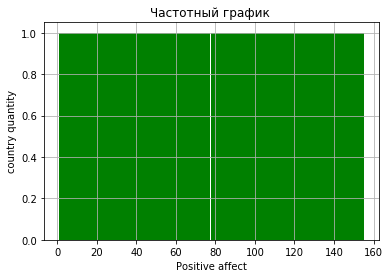

In [39]:
n, bins, patches = plt.hist(df['Positive affect'], len(df['Positive affect']), facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('country quantity')
plt.title('Частотный график ')
plt.grid(True)
plt.show()

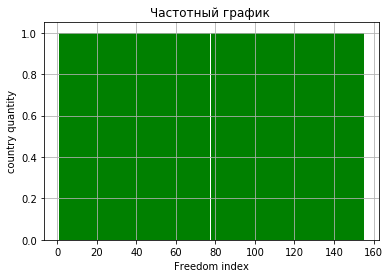

In [41]:
n, bins, patches = plt.hist(df['Freedom'], len(df['Freedom']), facecolor='g')

plt.xlabel('Freedom index')
plt.ylabel('country quantity')
plt.title('Частотный график ')
plt.grid(True)
plt.show()
#равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [55]:
def stat_basic(series):
    series1 = series.dropna()
    import statistics
    from collections import Counter
    med = statistics.median(series1)
    try:
        mod = statistics.mode(series1)
    except:
        mod = 'not unique, best pair key,count:' + str(Counter(series1.sort_values()).most_common(1))
    MO_mean = statistics.mean(series1)
    stdev = statistics.pstdev(series1)
    var = statistics.pvariance(series1)
    min_s = min(series1)
    max_s = max(series1)
    spike_na = series.isnull().sum()
    return {'медиана':med,'мода':mod,'математическое ожидание':MO_mean,'стандартное отклонение': stdev, 'дисперсия':var,
           'минимум': min_s, 'максимум': max_s, 'количество выбросов (NA)':spike_na, 'размах': max_s - min_s}

stat_basic(df['Freedom'])

{'медиана': 78.0,
 'мода': 'not unique, best pair key,count:[(1.0, 1)]',
 'математическое ожидание': 78.0,
 'стандартное отклонение': 44.74371464239419,
 'дисперсия': 2002.0,
 'минимум': 1.0,
 'максимум': 155.0,
 'количество выбросов (NA)': 1,
 'размах': 154.0}

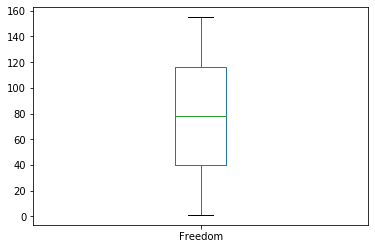

In [56]:
df['Freedom'].plot(kind='box') #выбросов нет

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

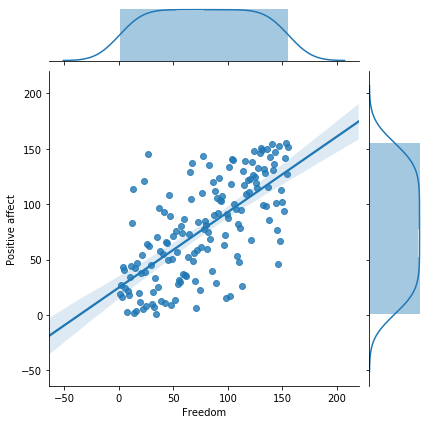

In [58]:
import seaborn as sns
sns.jointplot(x='Freedom', y='Positive affect', 
              data=df, kind='reg')

In [61]:
from scipy.stats import pearsonr
x = df['Positive affect'].dropna()
y = df['Freedom'].dropna()

corr, p_value = pearsonr(x, y)
print('Коэффициент корреляции Пирсона:', corr)
#значение коээфициента говорит о сильно выраженной прямопропорциональной зависимости между Freedom и Positive affect

Коэффициент корреляции Пирсона: 0.6817698430601656


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [74]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_n = min_max_scaler.fit_transform(np.array(df['Freedom'].dropna()-statistics.mean(df['Freedom'].dropna())).reshape(-1, 1))


Построить матрицу корреляций для всех колонок таблицы

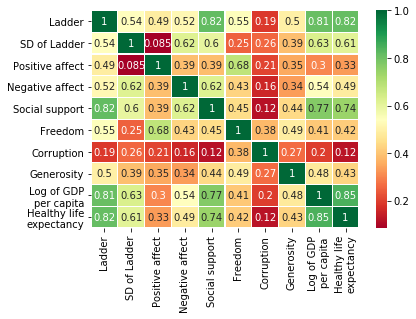

In [81]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()


Загрузить следующую таблицу: 

In [83]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df1=pd.read_csv(url)
df1[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

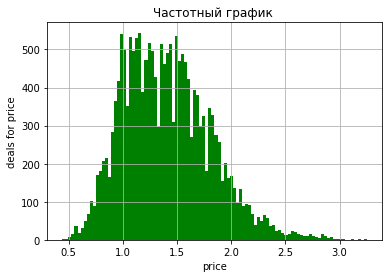

In [85]:
n, bins, patches = plt.hist(df1['AveragePrice'], 100, facecolor='g')
plt.xlabel('price')
plt.ylabel('deals for price')
plt.title('Частотный график ')
plt.grid(True)
plt.show()
#нормальное распределение

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [88]:
x = df1['4046'].dropna()
y = df['AveragePrice'].dropna()

corr, p_value = pearsonr(x, y)
corr

-0.20831704848788477

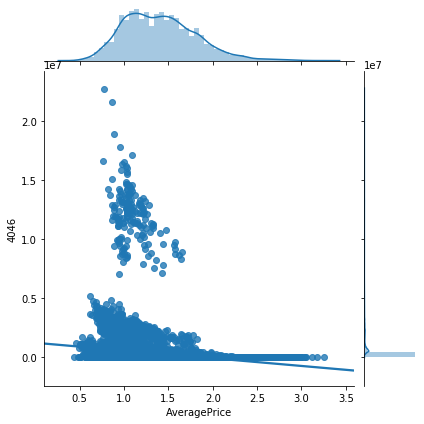

In [92]:
sns.jointplot(y, x, 
              data=df, kind='reg')